In [21]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.offline import plot
import ipywidgets as widgets

# %matplotlib widget
py.offline.init_notebook_mode(connected=True)

In [64]:
n_samples = 300

# generate random sample, two components
np.random.seed(0)

# # generate spherical data centered on (20, 20)
# shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# # generate zero centered stretched Gaussian data
# C = np.array([[0., -0.7], [3.5, .7]])
# stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# # concatenate the two datasets into the final training set
# X_train = np.vstack([shifted_gaussian, stretched_gaussian])

X_train = np.random.randn(n_samples, 2)

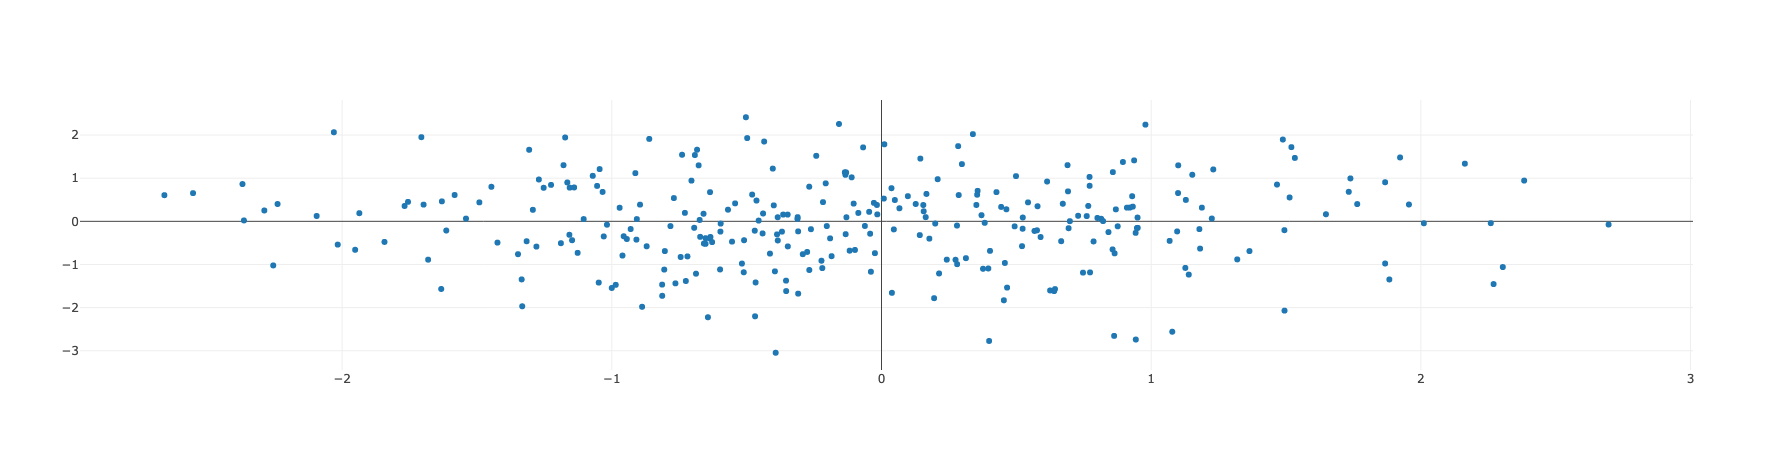

In [65]:
pts = go.Scatter(
    x=X_train[:,0],
    y=X_train[:,1],
    mode="markers"
)

iplot([pts])

In [95]:
nbins  = 20
xedges = np.linspace(-2,2,nbins+1)
yedges = np.linspace(-2,2,nbins+1)

xx, yy = np.meshgrid(xedges,yedges)
grid = np.array([x for x in zip(xx.ravel(), yy.ravel())])

In [96]:
# %%timeit
# grid = [x for xy in zip(xx,yy) for x in zip(*xy) ]
# grid[:10]

In [97]:
# %%timeit
# grid = np.array([x for x in zip(xx.ravel(), yy.ravel())])
# grid[:5]

array([[-2. , -2. ],
       [-1.8, -2. ],
       [-1.6, -2. ],
       [-1.4, -2. ],
       [-1.2, -2. ]])

In [99]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_train)

log_dens_kde=kde.score_samples(grid)
(np.exp(log_dens_kde))[:5]

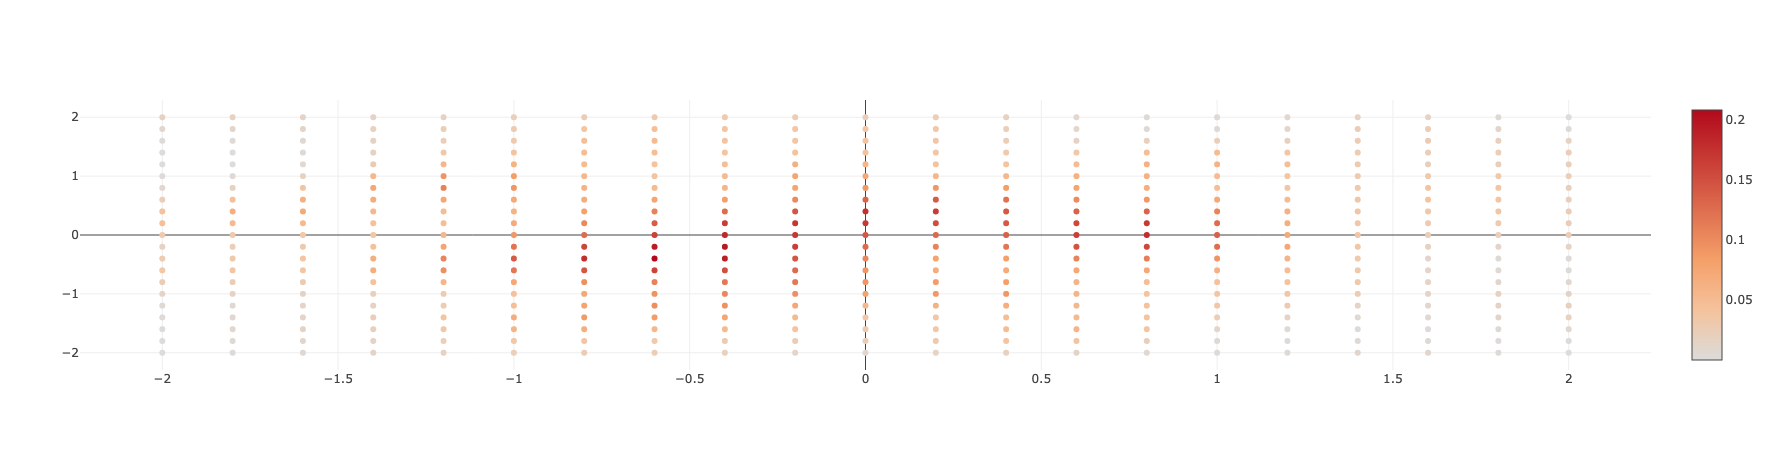

In [100]:
grid_pts = go.Scatter(
    x=grid[:,0],
    y=grid[:,1],
    mode="markers",
    marker=dict(
        color=np.exp(log_dens_kde),
        showscale=True
    ),
    text=np.exp(log_dens_kde)
)
iplot([grid_pts])

In [17]:
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=0.2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

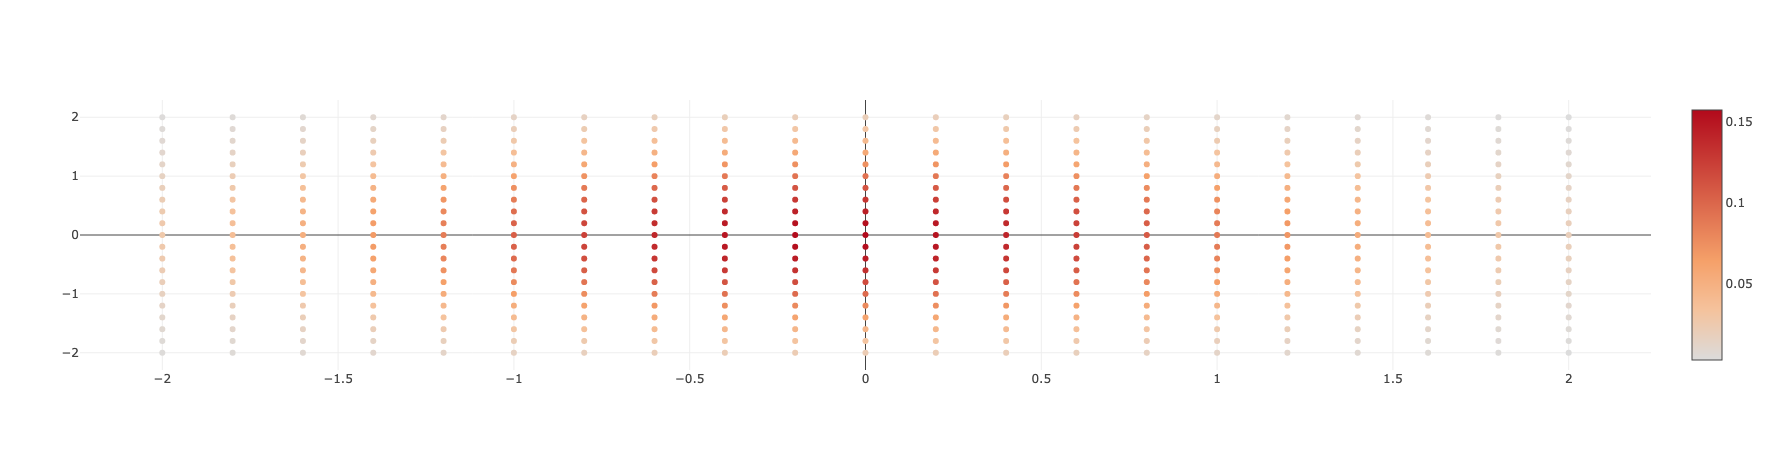

1734.809571622062

In [101]:
gmm = GaussianMixture(n_components=1).fit(X_train)

log_dens_gmm=gmm.score_samples(grid)
grid_pts["marker"]["color"] = np.exp(log_dens_gmm)

iplot([grid_pts])
gmm.bic(X_train)

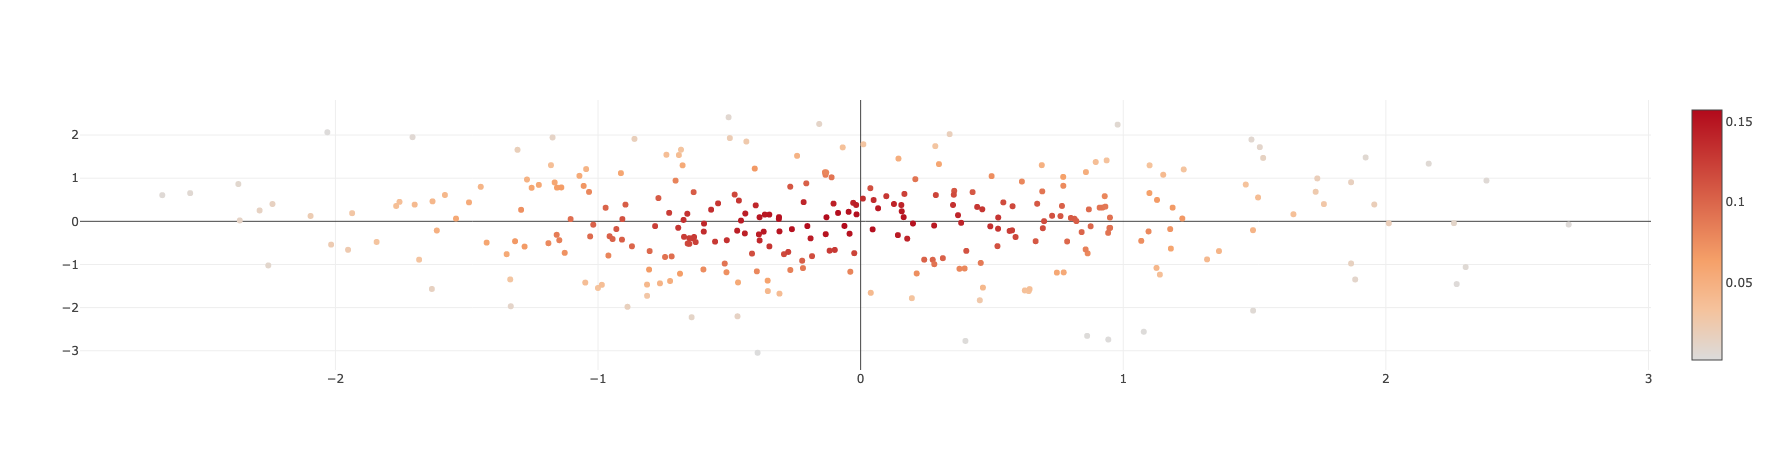

1734.809571622062

In [103]:
gmm = GaussianMixture(n_components=1).fit(X_train)

log_dens_gmm=gmm.score_samples(X_train)

pts["marker"]["color"] = np.exp(log_dens_gmm)
pts["marker"]["showscale"]=True
iplot([pts])
gmm.bic(X_train)

In [47]:
%%time

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type)
        gmm.fit(X_train)
        bic.append(gmm.bic(X_train))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
best_gmm

CPU times: user 135 ms, sys: 3.09 ms, total: 138 ms
Wall time: 137 ms


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

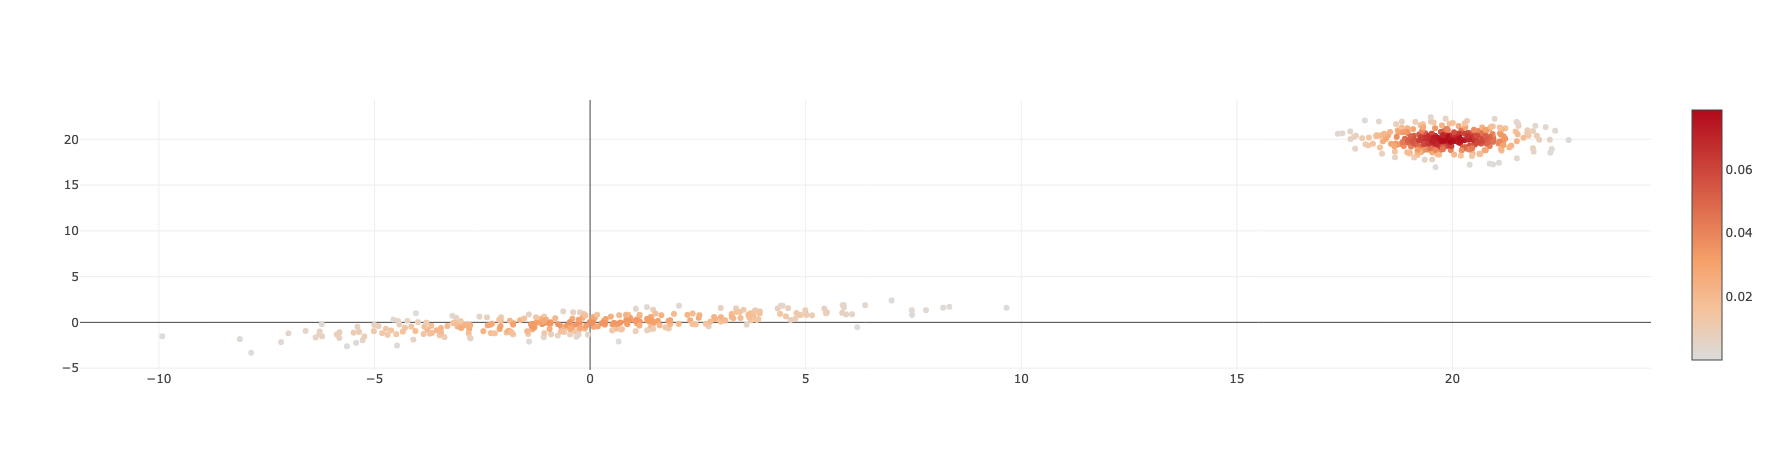

4786.352542129427

In [49]:
log_dens_gmm=best_gmm.score_samples(X_train)

pts["marker"]["color"] = np.exp(log_dens_gmm)
pts["marker"]["showscale"]=True
iplot([pts])
best_gmm.bic(X_train)

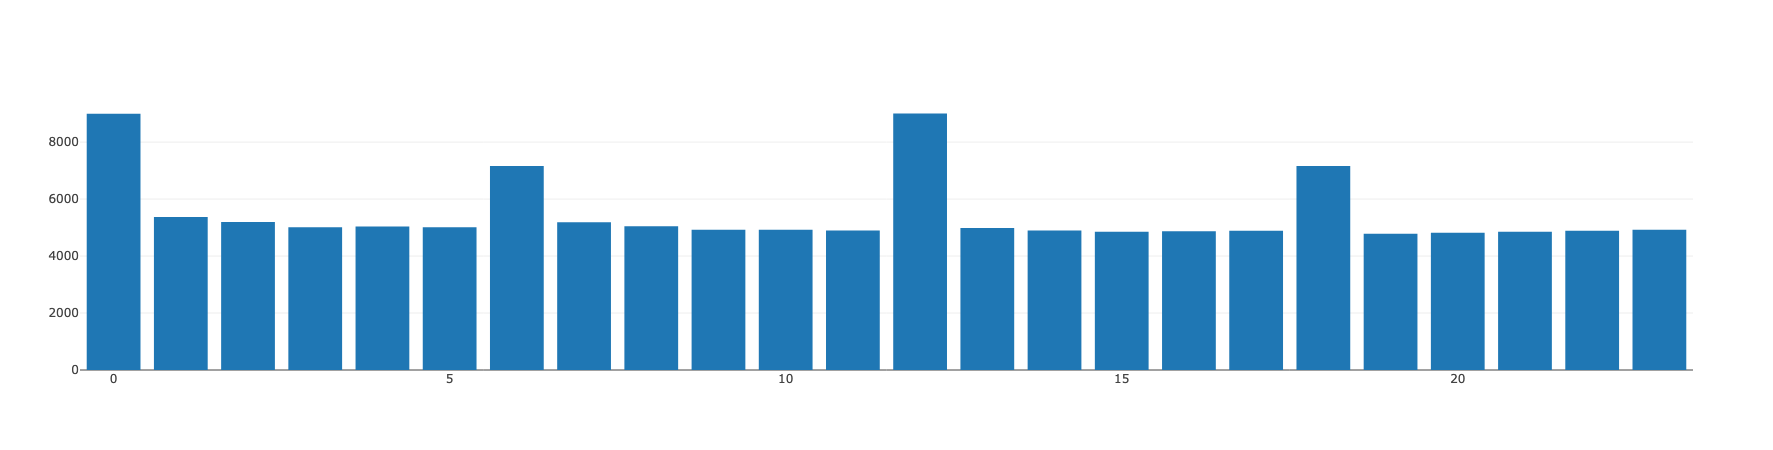

In [44]:
bic_bar = go.Bar(
    x=[x for x in range(0,len(bic))],
    y=bic
)
iplot([bic_bar])

In [56]:
nbins  = 3
xedges = np.linspace(0,3,nbins+1)
yedges = np.linspace(0,3,nbins+1)

xx, yy = np.meshgrid(xedges,yedges)

grid = [x for xy in zip(xx,yy) for x in zip(*xy) ]

In [63]:
log_dens_grid=np.exp(best_gmm.score_samples(grid))
log_dens_grid

array([3.59352084e-02, 3.31110504e-02, 2.54850408e-02, 1.63854092e-02,
       1.01543449e-02, 1.48463502e-02, 1.81320569e-02, 1.84983942e-02,
       2.80573059e-04, 6.50921707e-04, 1.26145315e-03, 2.04208156e-03,
       7.58057826e-07, 2.79061627e-06, 8.58138711e-06, 2.20431903e-05])